# 深度学习入门——学习笔记（一）

说明：本次练习代码均来自斋藤康毅的《深度学习入门》 ，全文不依赖其他框架，只基于numpy来构建深度学习网络。

### 一、激活函数
说明：激活函数相当于是神经网络的神经元，他们根据输入信号，反馈输出信号。因此不同类型的激活函数会构建成不同类型、不同敏感度的神经网络。

In [426]:
# 导入包
import numpy as np
# 导入作图包
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False 
# 忽略警告
import warnings
warnings.filterwarnings('ignore')

In [427]:
# 激活函数，阶跃函数
def step_function(x):
    return np.array(x>0, dtype=np.int)

In [428]:
# 激活函数，连续型，每一处导数均不为0，因此每一个x值都有一个方向以及程度上的反馈信号，因此可以通过反馈信号，不断更新我们的x，而阶跃函数不具有此性质
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [429]:
x=np.arange(-5,5,0.2)

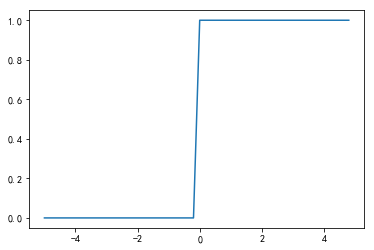

In [430]:
# 画出阶跃函数
y1=step_function(x)
plt.plot(x,y1)
plt.show()

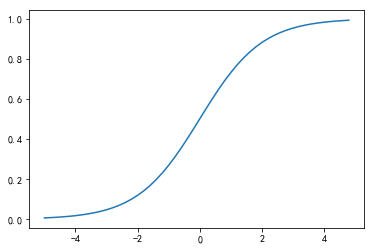

In [431]:
# 画出sigmoid函数
y2=sigmoid(x)
plt.plot(x,y2)
plt.show()

In [432]:
# relu函数
def relu(x):
    return np.maximum(0,x)

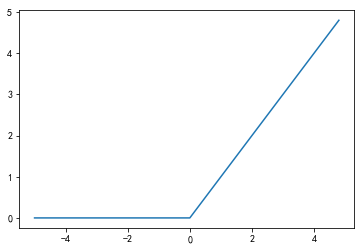

In [433]:
y3=relu(x)
plt.plot(x,y3)
plt.show()

### 二、输出层
说明：神经网络一般有输入层、中间层（也叫隐藏层）、输出层构成。输出层负责获得最终的计算结果，一般是一个概率值。

In [723]:
# softmax函数，可将任意范围的数转换到值域[0,1]，因此适合作为输出结果的概率函数。
def softmax(x):
    if x.ndim == 2:
        x = x.T # 转置后一行表示一个特征向量
        x = x - np.max(x, axis=0) # 在该特征向量上，每个特征值减去最大的特征值
        y = np.exp(x) / np.sum(np.exp(x), axis=0) 
        return y.T # 计算完后再转置回来，每行表示一个样本

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

In [724]:
x=np.array([10,20,40]) #x.ndim=1
print(softmax(x))
x=np.array([[20,2,3],[40,3,1]]) # x.ndim=2
print(softmax(x))

[9.35762295e-14 2.06115362e-09 9.99999998e-01]
[[9.99999943e-01 1.52299789e-08 4.13993748e-08]
 [1.00000000e+00 8.53304763e-17 1.15482242e-17]]


### 三、损失函数
说明：神经网络需要更新神经元之间连接的权重参数，以使得最终网络预测的结果与真实结果是相近的。因此，整个网络需要有一个优化目标来更新这些参数，我们一般定义计算的结果与真实结果的差异作为优化的目标。这种差异可以有多种定义方式，比如误差、均方误差、交叉熵等。

In [567]:
# 损失函数，均方误差，y为神经网络的输出，t为真实标签
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [585]:
# 损失函数，交叉熵，y为神经网络的输出，t为真实标签，若t为one-hot编码，假设结果标签是数字1-5的值，则[0,1,0,0,0]表示这个样本的真实值是2。因此t为0的元素其交叉熵也为0，可用t*np.log(y+1e-7)来计算
def cross_entropy_error_onehot(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size) # 1行，t.size列
        y=y.reshape(1,y.size)
    batch_size=y.shape[0] # y的行数
    return -np.sum(t*np.log(y+1e-7))/batch_size # 除以batch_size是为了归一化，得到数据的平均交叉熵误差

In [657]:
# 示例数据，y 为（batch_size,3),t为（batch_size,3), batch_size表示样本数，此处为4，3则表示有3种结果
y=np.array([[1,0,0],[0,1,0],[1,0,0],[0,0,1]])
t=np.array([[1,0,0],[0,1,0],[1,0,0],[0,0,1]])
# 计算损失函数的值
print("y的维数:",y.ndim)
print("第一个样本的y:",y[0])
print("第一个样本的t:",t[0])
print("样本的个数:",y.shape[0])
print("y的总长度:",y.size)
print("损失函数的值:",cross_entropy_error_onehot(y,t))

y的维数: 2
第一个样本的y: [1 0 0]
第一个样本的t: [1 0 0]
样本的个数: 4
y的总长度: 12
损失函数的值: -9.999999505838704e-08


In [678]:
# 损失函数，交叉熵，若y为one-hot编码，但t为非one-hot编码。
def cross_entropy_error_notonehot(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    print("t.shape:",t.shape)
    batch_size=y.shape[0] 
    print(np.arange(batch_size)) # [0 1 2 3]
    print(y[np.arange(batch_size),t]) # [0 1 1 1]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [681]:
# 示例数据，y 为（batch_size,3),t为（batch_size,),t是一维的
y=np.array([[1,0,0],[0,1,0],[1,0,0],[0,0,1]])
t_onehot=np.array([[0,1,0],[0,1,0],[1,0,0],[0,0,1]])
t = t_onehot.argmax(axis=1)# 非 one-hot [1 1 0 2]
# 计算损失函数的值
print("损失函数的值:",cross_entropy_error_notonehot(y,t))

t.shape: (4,)
[0 1 2 3]
[0 1 1 1]
损失函数的值: 4.029523837739585


In [682]:
# 最终损失函数
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [712]:
# 示例数据，y 为（batch_size,3),t为（batch_size,),t是一维的
y=np.array([[1,0,0],[0,1,0],[1,0,0],[0,0,1]])
t_onehot=np.array([[0,1,0],[0,1,0],[1,0,0],[0,0,1]])
t = t_onehot.argmax(axis=1)# 非 one-hot [1 1 0 2]
# 计算损失函数的值
print("损失函数的值:",cross_entropy_error(y,t))

损失函数的值: 4.029523837739585


### 四、梯度
说明：损失函数告诉了我们网络计算的结果与真实结果的差异，但是并没有告诉我们应该如何更新权重参数。梯度即是定义参数变化对损失函数的影响值。我们最终希望得到最小的预测差异，也就是说在某些参数值附近，参数的变化对预测差异已经没有多少影响了。梯度不断的减小，最终趋于0时，我们就找到了那些参数。

In [683]:
# 方程1
def function_1(x):
    return 0.01*x**3 + 0.1*x

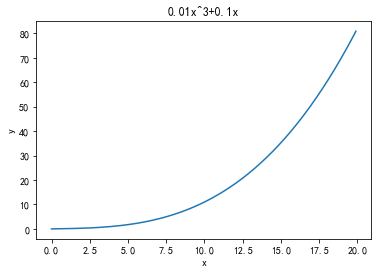

In [684]:
# 示例数据作图
x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("0.01x^3+0.1x")
plt.show()

In [685]:
# 求导数
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x))/(2*h)

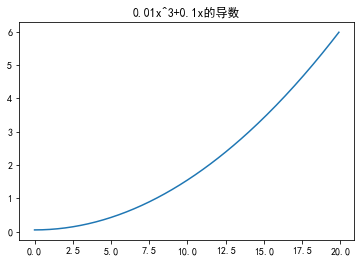

In [686]:
# 示例作图
y1=numerical_diff(function_1,x)
plt.plot(x,y1)
plt.title("0.01x^3+0.1x的导数")
plt.show()

In [687]:
# 方程2
def function_2(x):
    return x[0]**2 + x[1]**2
    # 或者 return np.sum(x**2)

In [688]:
x=np.array([3,4])
function_2(x)

25

In [689]:
# 计算函数f在x处的梯度值,x是一个一维的数组，表示某一个x=[x0,x1,x2,x3...xn]，n为空间的维度
def numerical_gradient_1d(f,x):
    x=x.astype(float) # 转为float类型
    h=1e-4
    grad=np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val=x[idx]
        
        # f(x+h)计算
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        # f(x-h)的计算
        x[idx]=tmp_val-h
        fxh2=f(x)
        #print("idx:{0},fxh1:{1},fxh2:{2}".format(idx,fxh1,fxh2))
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
        
    return grad

In [690]:
numerical_gradient_1d(function_2,np.array([3,4]))

array([6., 8.])

In [691]:
# 如果 x是一个矩阵，则需要用到numpy自带的迭代器nditer
def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
        
    return grad

In [692]:
# 梯度下降法，每次更新x值，更新的程度就是x的梯度乘以一个系数，这样梯度越大，x更新的就越大，最终梯度为0附近时，x就不更新了。
def gradient_decent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    xplot=np.zeros((step_num,2))
    for i in range(step_num):
        grad = numerical_gradient_1d(f,x)
        x -= lr*grad
        xplot[i,:]=x
    return xplot,x

In [693]:
# 用梯度下降法求f(x0+x1)=x0^2+x1^2的最小值
init_x=np.array([-3.,4.])
xplot,x=gradient_decent(function_2,init_x,lr=0.1,step_num=100)
print("最小值为：{0}".format(x))

最小值为：[-6.11110793e-10  8.14814391e-10]


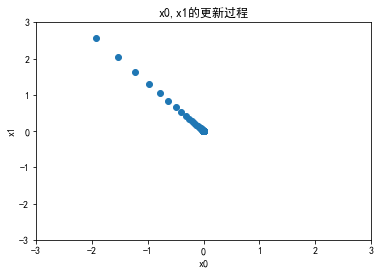

In [694]:
# 画出x更新的过程
plt.scatter(xplot[:,0],xplot[:,1])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("x0,x1的更新过程")
txt=np.array(100)
plt.show()

In [725]:
# 神经网络的梯度。神经网络的梯度定义为损失函数关于权重参数的梯度。因为我们最终求的是权重参数值，因此梯度定义为权重参数的改变对损失函数的影响程度。
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 随机初始化权重参数
    def predict(self,x):
        return np.dot(x, self.W)
    def loss(self,x,t):
        z = self.predict(x) # 预测值
        y = softmax(z) # 输出层
        loss = cross_entropy_error(y,t) # 计算差异
        return loss

In [726]:
# 测试一下这个神经网络
net = simpleNet()
print(">>>网络连接的权重参数为：\n{0}".format(net.W))
x=np.array([0.6,0.9])
p=net.predict(x)
print(">>>预测值为：\n{0}".format(p))
print(">>>预测值的索引：\n{0}".format(np.argmax(p)))
t=np.array([1,0,0])
loss=net.loss(x,t)
print(">>>误差为：\n{0}".format(loss))

>>>网络连接的权重参数为：
[[-1.2113439   0.32843788  0.3827121 ]
 [-1.48413071 -1.21658075 -2.36810466]]
>>>预测值为：
[-2.06252398 -0.89785994 -1.90166693]
>>>预测值的索引：
1
>>>误差为：
1.682569435059308


In [727]:
# 计算梯度，参数W即是之前的x，我们期望求的是Loss关于参数W的梯度
def f(W):
    return net.loss(x,t) # 函数定义为，给一个参数W，即返回这个W对应的loss
dW = numerical_gradient(f,net.W)
print(">>>W处的梯度为：\n{0}".format(dW))

>>>W处的梯度为：
[[-0.48846237  0.3574599   0.13100247]
 [-0.73269355  0.53618985  0.19650371]]


### 五、整个学习过程的实现
说明：神经网络的学习过程主要分为，获得训练数据、计算训练数据的损失函数、计算各权重参数的梯度、将权重参数更新、不断重复以上步骤，达到某个条件后停止更新。

In [728]:
# 定义两层的神经网络
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        # input_size 输入层神经元的个数
        # hidden_size 中间层神经元的个数
        # output_size 输出层神经元的个数
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 第一层权重参数，即输入与中间层之间的权重参数
        self.params['b1'] = np.zeros(hidden_size) # 第一层偏置参数
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # 第二层权重参数
        self.params['b2'] = np.zeros(output_size) # 第二层偏置参数

    def predict(self, x):
        # 根据输入的x，计算预测值y
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    def loss(self, x, t):
        # 根据输入x，真实的标签t，计算差异值
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        # 统计预测的正确率
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        # 根据输入的x，真实的标签t，计算各网络参数对应的梯度grads
        loss_W = lambda W: self.loss(x, t) # 定义基于权重参数的损失函数loss_W
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 根据损失函数，以及目前第一层的权重参数W1，计算W1对应的梯度
        grads['b1'] = numerical_gradient(loss_W, self.params['b1']) # 类似
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # 误差反向传播法
        # 根据输入的x，真实的标签t，计算各网络参数对应的梯度grads，是numerical_gradient方法的高速版。
        # 先是根据输入的x，真实的标签t，向前传播，计算预测值y
        # 根据预测值与真实值的差异，反向更新各层的参数对应的梯度值
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0] # 输入的一批样本的个数
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1) # 第一层神经元的输出值
        a2 = np.dot(z1, W2) + b2 
        y = softmax(a2) # y为预测值
        
        # backward
        dy = (y - t) / batch_num # 预测值与真实值的差异
        grads['W2'] = np.dot(z1.T, dy) # 根据差异值，第一层神经元的输出值，计算第二层的权重参数
        grads['b2'] = np.sum(dy, axis=0) # 根据差异值，更新第二层的偏置参数
        
        da1 = np.dot(dy, W2.T) 
        dz1 = sigmoid_grad(a1) * da1 
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [729]:
# 测试二层的神经网络的各个参数
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
print("W1的形状：",net.params['W1'].shape)
print("b1的形状：",net.params['b1'].shape)
print("W2的形状：",net.params['W2'].shape)
print("b2的形状：",net.params['b2'].shape)

W1的形状： (784, 100)
b1的形状： (100,)
W2的形状： (100, 10)
b2的形状： (10,)


In [577]:
# 测试各参数的梯度的计算结果
x=np.random.rand(100,784)
y=net.predict(x)
t=np.random.rand(100,10)
grads = net.numerical_gradient(x,t) # 计算时间较长，请耐心等待。
print("W1的梯度的形状：",grads['W1'].shape)
print("b1的梯度的形状：",grads['b1'].shape)
print("W2的梯度的形状：",grads['W2'].shape)
print("b2的梯度的形状：",grads['b2'].shape)

W1的梯度的形状： (784, 100)
b1的梯度的形状： (100,)
W2的梯度的形状： (100, 10)
b2的梯度的形状： (10,)


In [730]:
# 开始训练
# 载入python自带的数据集mnist
from dataset.mnist import load_mnist
(x_train,t_train),(x_test,y_test)=  load_mnist(normalize=True,one_hot_label=True) # 载入时间较长，请耐心等待

In [731]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [732]:
# 初始化以及参数设定
train_loss_list=[]
# 定义超参数。超参数与模型本身的参数不同，是与网络参数学习相关的参数。
iters_num = 1000
train_size=x_train.shape[0]
batch_size=100 #每次采样的个数
learning_rate=0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [733]:
# 训练过程
for i in range(iters_num):
    print("\r训练进度：{0}%".format(int((i+1)/iters_num*100)),end="")
    # 采样
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算mini-batch数据下的梯度
    # grad = network.numerical_gradient(x_batch,t_batch)
    grad = network.gradient(x_batch,t_batch) # 高速版
    
    # 更新参数
    for key in ('W1','b1','W2',"b2"):
        network.params[key] -= learning_rate * grad[key]
    
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

训练进度：100%

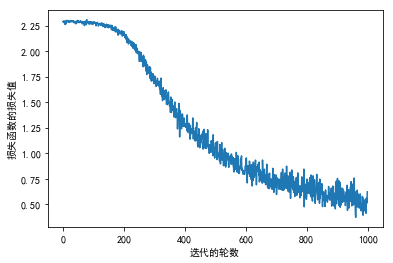

In [736]:
# 画出损失函数的值的迭代图像
plt.plot(train_loss_list)
plt.ylabel("损失函数的损失值")
plt.xlabel("迭代的轮数")
plt.show()